# Linear Regression Project

## Paso 1: Carga del conjunto de datos

In [2]:
import logging # crea una bitacora de incidencias de nuestro script
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Machine Learning
from sklearn.preprocessing import (
    MinMaxScaler, 
    OneHotEncoder
)
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

logger = logging.getLogger()
logger.setLevel(logging.INFO) 

In [3]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df_raw = df_raw.drop_duplicates().reset_index(drop = True)

In [5]:
df_raw.sample(10, random_state=2025)

,age,sex,bmi,children,smoker,region,charges
1087,52,male,47.740,1,no,southeast,9748.91060
941,18,female,40.185,0,no,northeast,2217.46915
932,45,female,35.300,0,no,southwest,7348.14200
1228,58,male,30.305,0,no,northeast,11938.25595
272,41,male,37.050,2,no,northwest,7265.70250
738,29,male,35.500,2,yes,southwest,44585.45587
1104,54,female,31.240,0,no,southeast,10338.93160
1181,25,female,30.300,0,no,southwest,2632.99200
14,27,male,42.130,0,yes,southeast,39611.75770
596,34,female,33.250,1,no,northeast,5594.84550


## Paso 2: Data preprocessing

In [6]:
df_baking = df_raw.copy()
df_baking['sex_n'] = pd.factorize(df_baking['sex'])[0]
df_baking['smoker_n'] = pd.factorize(df_baking['smoker'])[0]
df_baking['region_n'] = pd.factorize(df_baking['region'])[0]
var = ["age", "bmi", "children", "sex_n", "region_n", "smoker_n","charges"]
df = df_baking[var].copy()
df.head()

,age,bmi,children,sex_n,region_n,smoker_n,charges
0,19,27.900,0,0,0,0,16884.92400
1,18,33.770,1,1,1,1,1725.55230
2,28,33.000,3,1,1,1,4449.46200
3,33,22.705,0,1,2,1,21984.47061
4,32,28.880,0,1,2,1,3866.85520


## Paso 3:  Exploratory Data Analysis

In [7]:
df_train, df_test = train_test_split(df,test_size=0.2,random_state=42)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1069 non-null   int64  
 1   bmi       1069 non-null   float64
 2   children  1069 non-null   int64  
 3   sex_n     1069 non-null   int64  
 4   region_n  1069 non-null   int64  
 5   smoker_n  1069 non-null   int64  
 6   charges   1069 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 58.6 KB


In [8]:
display(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,1069.0,39.198316,13.998594,18.0000,27.0000,39.0000,51.0000,64.00000
bmi,1069.0,30.540426,6.051841,15.9600,26.1800,30.2000,34.4300,53.13000
children,1069.0,1.084191,1.194723,0.0000,0.0000,1.0000,2.0000,5.00000
sex_n,1069.0,0.514500,0.500024,0.0000,0.0000,1.0000,1.0000,1.00000
region_n,1069.0,1.472404,1.104314,0.0000,1.0000,1.0000,2.0000,3.00000
smoker_n,1069.0,0.799813,0.400328,0.0000,1.0000,1.0000,1.0000,1.00000
charges,1069.0,13030.203369,11706.530971,1121.8739,4747.0529,9290.1395,16450.8947,62592.87309


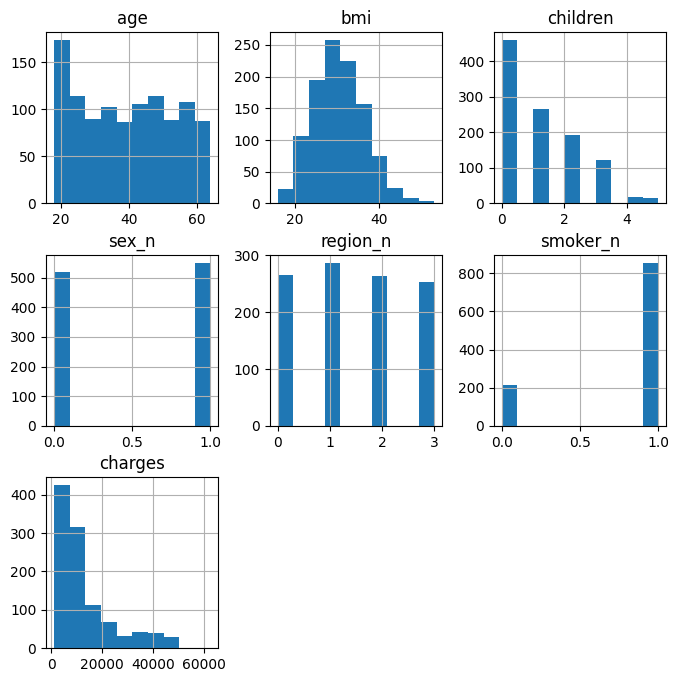

In [9]:
df_train.hist(figsize=(8,8))
plt.show()

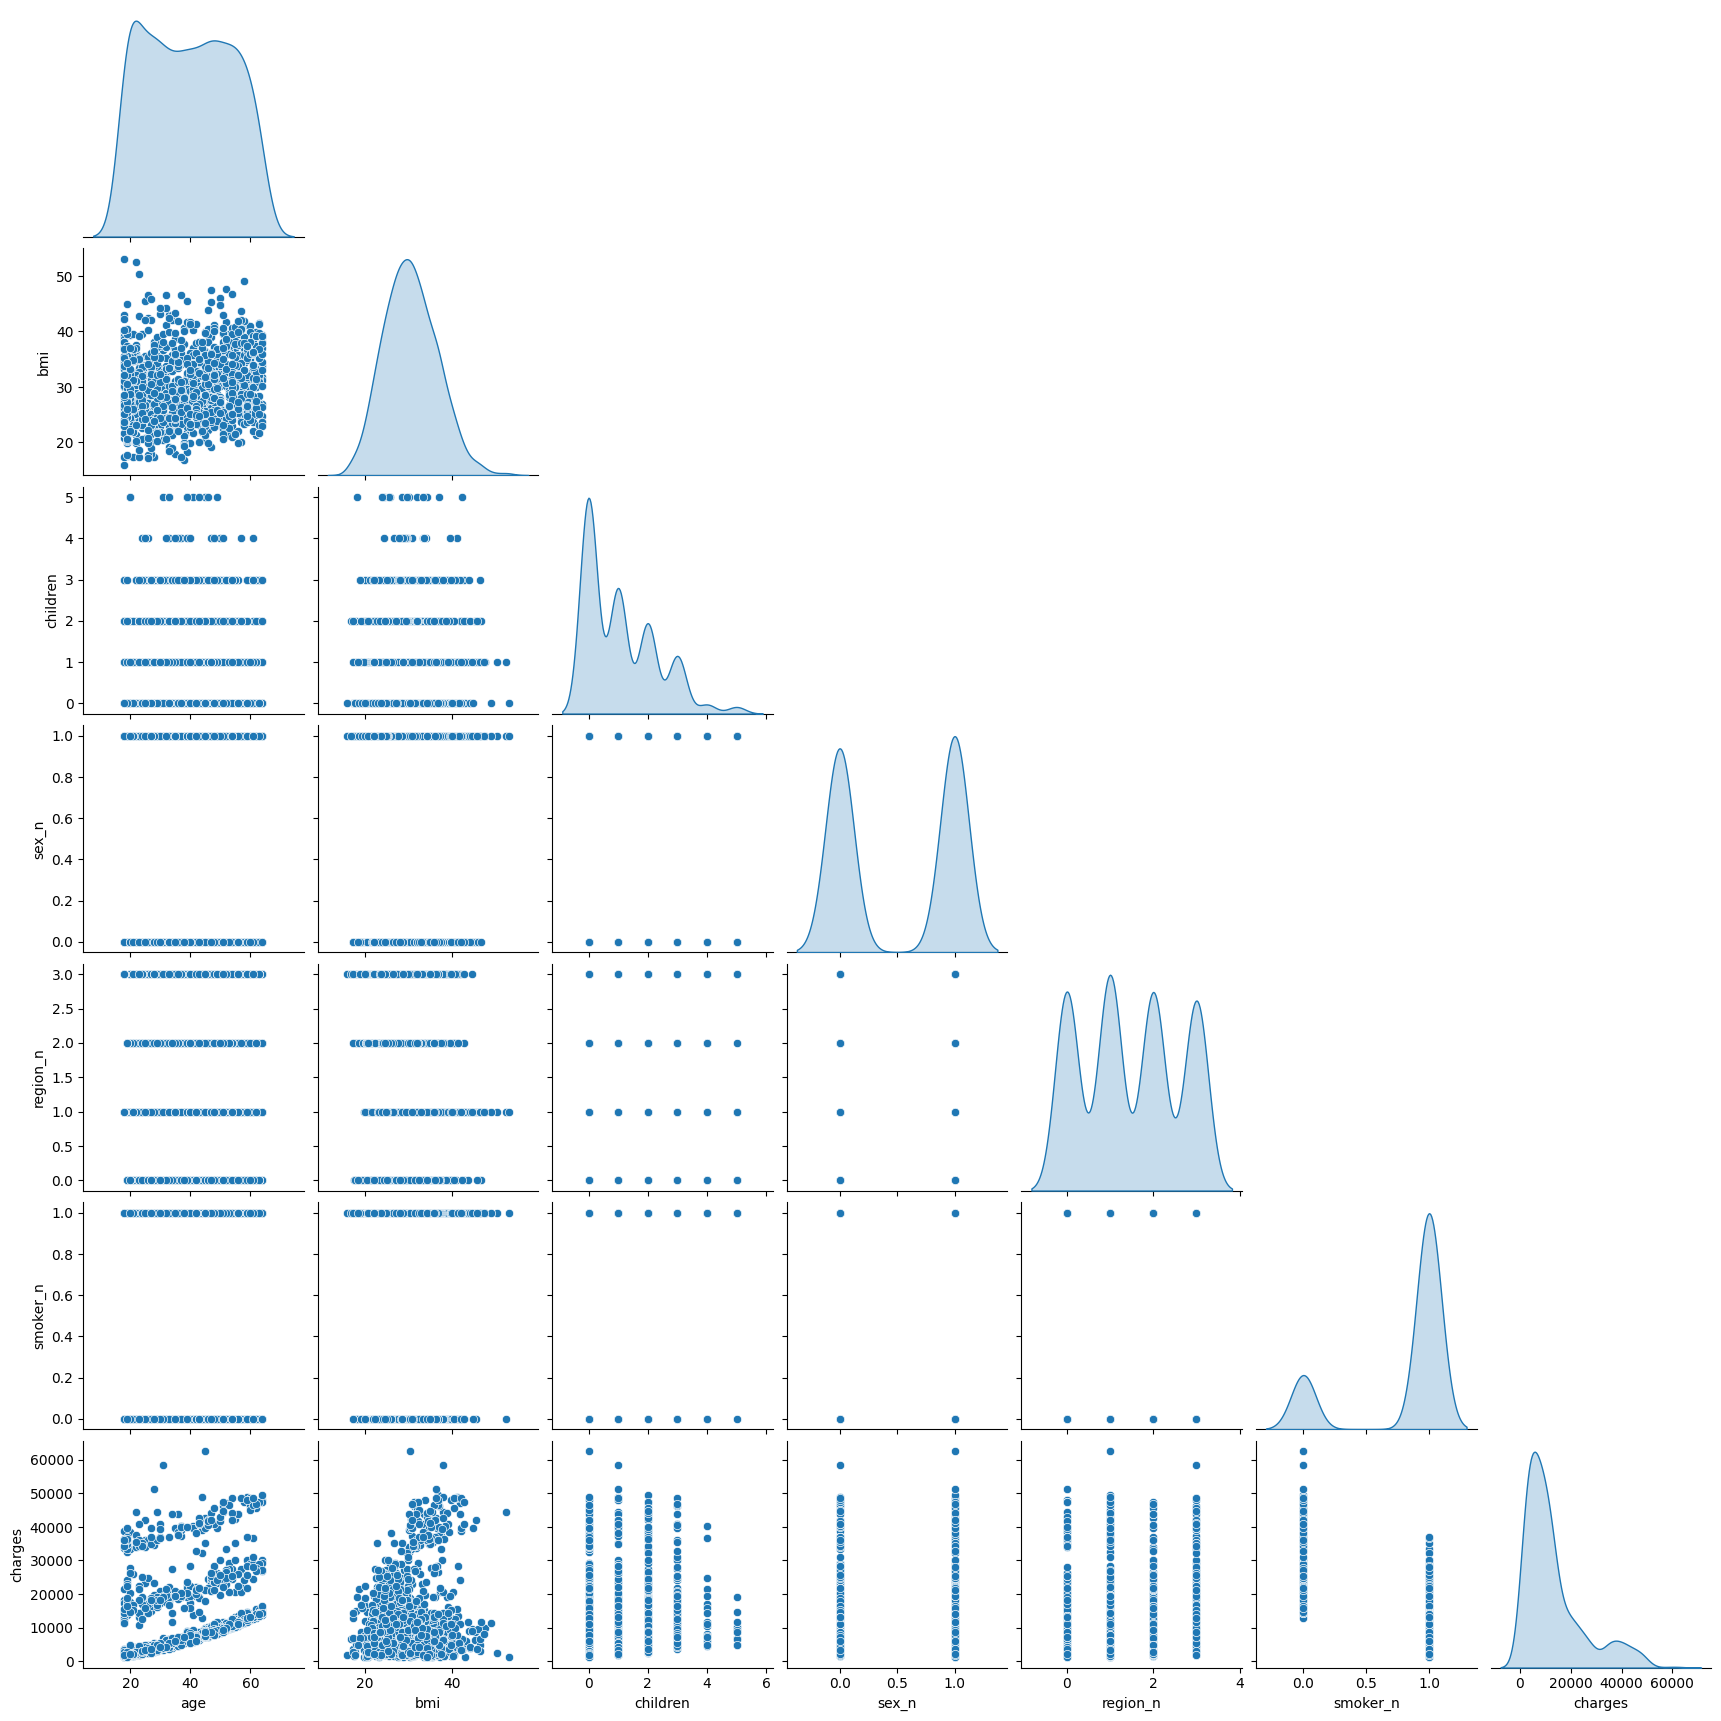

In [10]:
sns.pairplot(df_train, diag_kind='kde', corner=True)# Especifica que los gráficos diagonales (que muestran la distribución de cada variable) 
# deben ser gráficos de densidad de Kernel (KDE) en lugar de histogramas. KDE es una técnica para estimar la función de 
# densidad de probabilidad de una variable aleatoria.
plt.show()

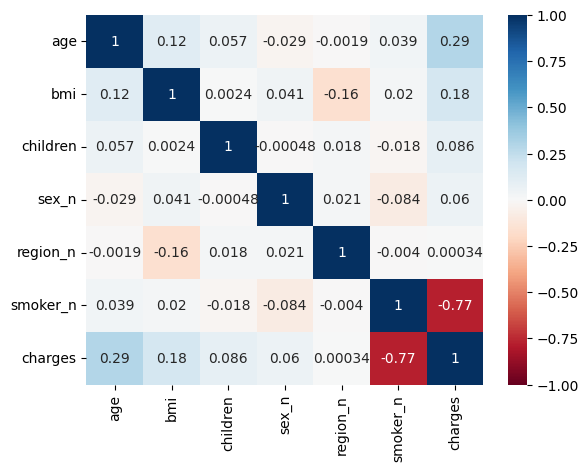

In [11]:
sns.heatmap(df_train.corr(),vmin=-1,vmax=1,cmap='RdBu',annot=True)
plt.show()

In [12]:
X_train = df_train.drop('charges', axis=1)
y_train = df_train['charges']
X_test = df_test.drop('charges', axis=1)
y_test = df_test['charges']

In [13]:
selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,children,smoker_n
0,23.0,24.510,0.0,1.0
1,21.0,25.745,2.0,1.0
2,52.0,37.525,2.0,1.0
3,63.0,41.470,0.0,1.0
4,47.0,26.600,2.0,1.0


In [14]:
X_train_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1069 non-null   float64
 1   bmi       1069 non-null   float64
 2   children  1069 non-null   float64
 3   smoker_n  1069 non-null   float64
dtypes: float64(4)
memory usage: 33.5 KB


In [15]:
# Convertir y_train y y_test a DataFrames
y_train = y_train.to_frame()
y_test = y_test.to_frame()

# Escalar la variable objetivo
target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train)
y_test_scaled = target_scaler.transform(y_test)

In [16]:
num_proc = Pipeline([
    ("scaler",MinMaxScaler())
])
lreg_p = Pipeline([
    ('num_processer', num_proc),
    ('lreg', LinearRegression())
])

In [17]:
lreg_p.fit(X_train_sel,y_train_scaled)

Pipeline(steps=[('num_processer', Pipeline(steps=[('scaler', MinMaxScaler())])),
                ('lreg', LinearRegression())])

In [18]:
y_hat = lreg_p.predict(X_test_sel)
print(f'MSE: {mean_squared_error(y_test_scaled, y_hat)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_scaled, y_hat))}')
print(f'R2: {r2_score(y_test_scaled, y_hat)}')

MSE: 0.009504513724391745
RMSE: 0.09749109561591636
R2: 0.8045531086669286


In [19]:
print(f'intercept:{lreg_p["lreg"].intercept_}') # beta_0
print(f'coeficients:{lreg_p["lreg"].coef_}') # list of beta (beta_1, beta_2, beta_3.....beta_n)

intercept:[0.32570473]
coeficients:[[ 0.18647492  0.18458768  0.04375821 -0.37485168]]


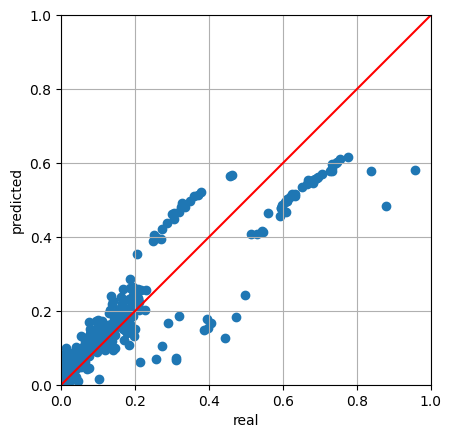

In [20]:
plt.scatter(y_test_scaled, y_hat)
plt.plot([0,10],[0,10],color='r')
plt.xlabel('real')
plt.ylabel('predicted')
plt.grid(True)
plt.axis('equal')
# Ajusta el aspecto del gráfico
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
# Ajusta los límites de los ejes
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.show()

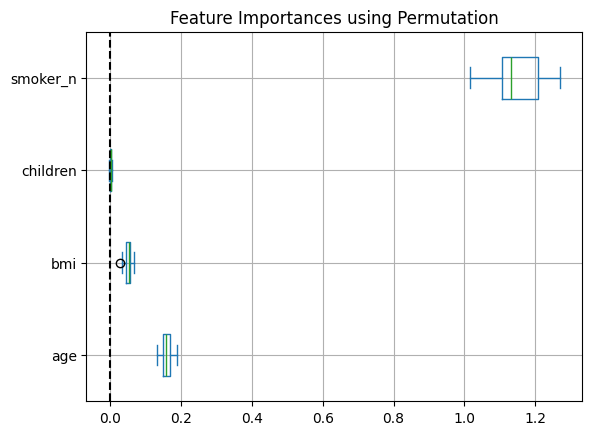

In [21]:
importance = permutation_importance(lreg_p, X_test_sel, y_test_scaled, n_repeats=25, random_state=2025)
importance_df = pd.DataFrame(importance.importances.T,columns=X_test_sel.columns)
ax = importance_df.plot.box(vert=False)
ax.axvline(x=0,color='k',linestyle='--')
ax.set_title('Feature Importances using Permutation')
ax.grid(True)
plt.show()